In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [4]:
model = LogisticRegression()

In [5]:
model.fit(x, y)

LogisticRegression()

In [6]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [7]:
model.predict_proba(x)

array([[0.98411203, 0.01588797],
       [0.95003074, 0.04996926],
       [0.85370936, 0.14629064],
       [0.64173546, 0.35826454],
       [0.35475873, 0.64524127],
       [0.1443924 , 0.8556076 ],
       [0.04924876, 0.95075124],
       [0.01565079, 0.98434921],
       [0.00485659, 0.99514341],
       [0.00149573, 0.99850427]])

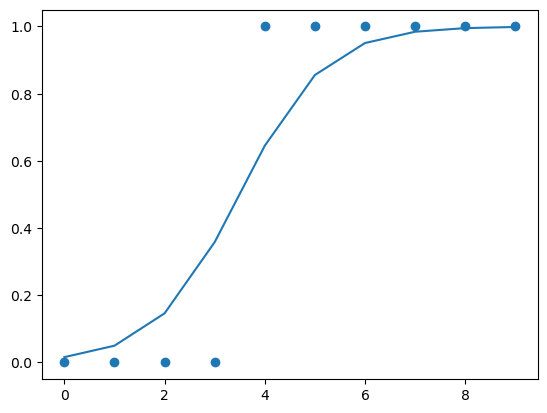

In [19]:
plt.scatter(x, y)
prob = model.predict_proba(x)[:, 1]
plt.plot(x, prob)

<Axes: >

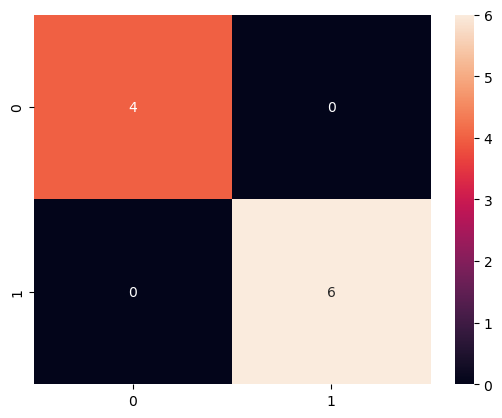

In [15]:
cm = confusion_matrix(y, model.predict(x))
sns.heatmap(cm, annot=True)

In [16]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [20]:
model.score(x, y)

1.0

In [22]:
from sklearn import datasets

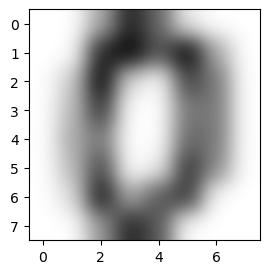

In [23]:
digits = datasets.load_digits()

plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='gaussian')

In [29]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [27]:
x = digits.data
y = digits.target

In [28]:
x.shape

(1797, 64)

In [30]:
y.shape

(1797,)

In [31]:
from sklearn.model_selection import train_test_split

In [34]:
np.max(x)

16.0

In [35]:
np.min(x)

0.0

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [39]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [41]:
model = LogisticRegression(solver='liblinear')

In [44]:
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [45]:
model.score(x_train, y_train)

0.9976133651551312

In [46]:
model.score(x_test, y_test)

0.9537037037037037

<Axes: >

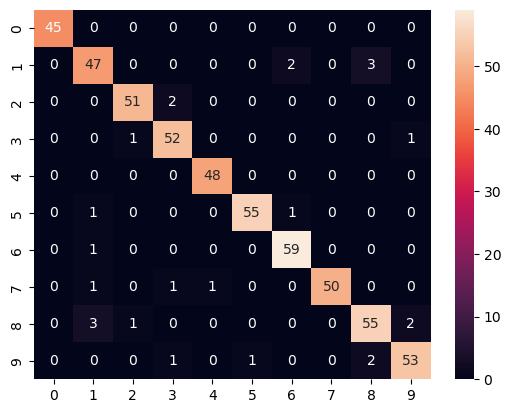

In [47]:
cm = confusion_matrix(y_test, model.predict(x_test))
sns.heatmap(cm, annot=True)

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [50]:
model = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(solver='liblinear'))
    ]
)

In [51]:
model.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(solver='liblinear'))])

In [52]:
model.score(x_test, y_test)

0.9537037037037037

In [ ]:
weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast']
temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

play = ['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No']